# <span style="color:#e53935;font-size:10vw;font-weight:800;text-shadow:2px 2px 4px #aaa">Mnist CNN</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">One Day Development Programe</span>
## <span style="font-size:4vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:4vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a></span>

In [12]:
from keras.datasets import mnist
from matplotlib import pyplot as  plt
from PIL.Image import fromarray
from IPython import display
from warnings import filterwarnings
import os
filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

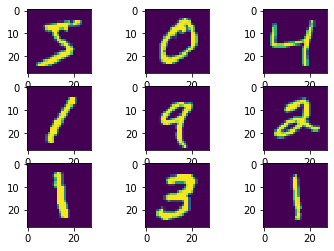

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(fromarray(X_train[i]))
pyplot.show()

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [5]:
img_rows, img_cols = 28, 28

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
model = Sequential()
model.add(
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.4280 - accuracy: 0.9060 - val_loss: 0.0711 - val_accuracy: 0.9786
Epoch 2/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1456 - accuracy: 0.9585 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 3/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1081 - accuracy: 0.9695 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 4/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0976 - accuracy: 0.9720 - val_loss: 0.0434 - val_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0829 - accuracy: 0.9760 - val_loss: 0.0482 - val_accuracy: 0.9846
Epoch 6/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0758 - accuracy: 0.9778 - val_loss: 0.0450 - val_accuracy: 0.9879
Epoch 7/10
60000/60000 [==============================] - 102s

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print(('Test loss:', score[0]))
print(('Test accuracy:', score[1]))

('Test loss:', 0.040758305517333955)
('Test accuracy:', 0.989300012588501)


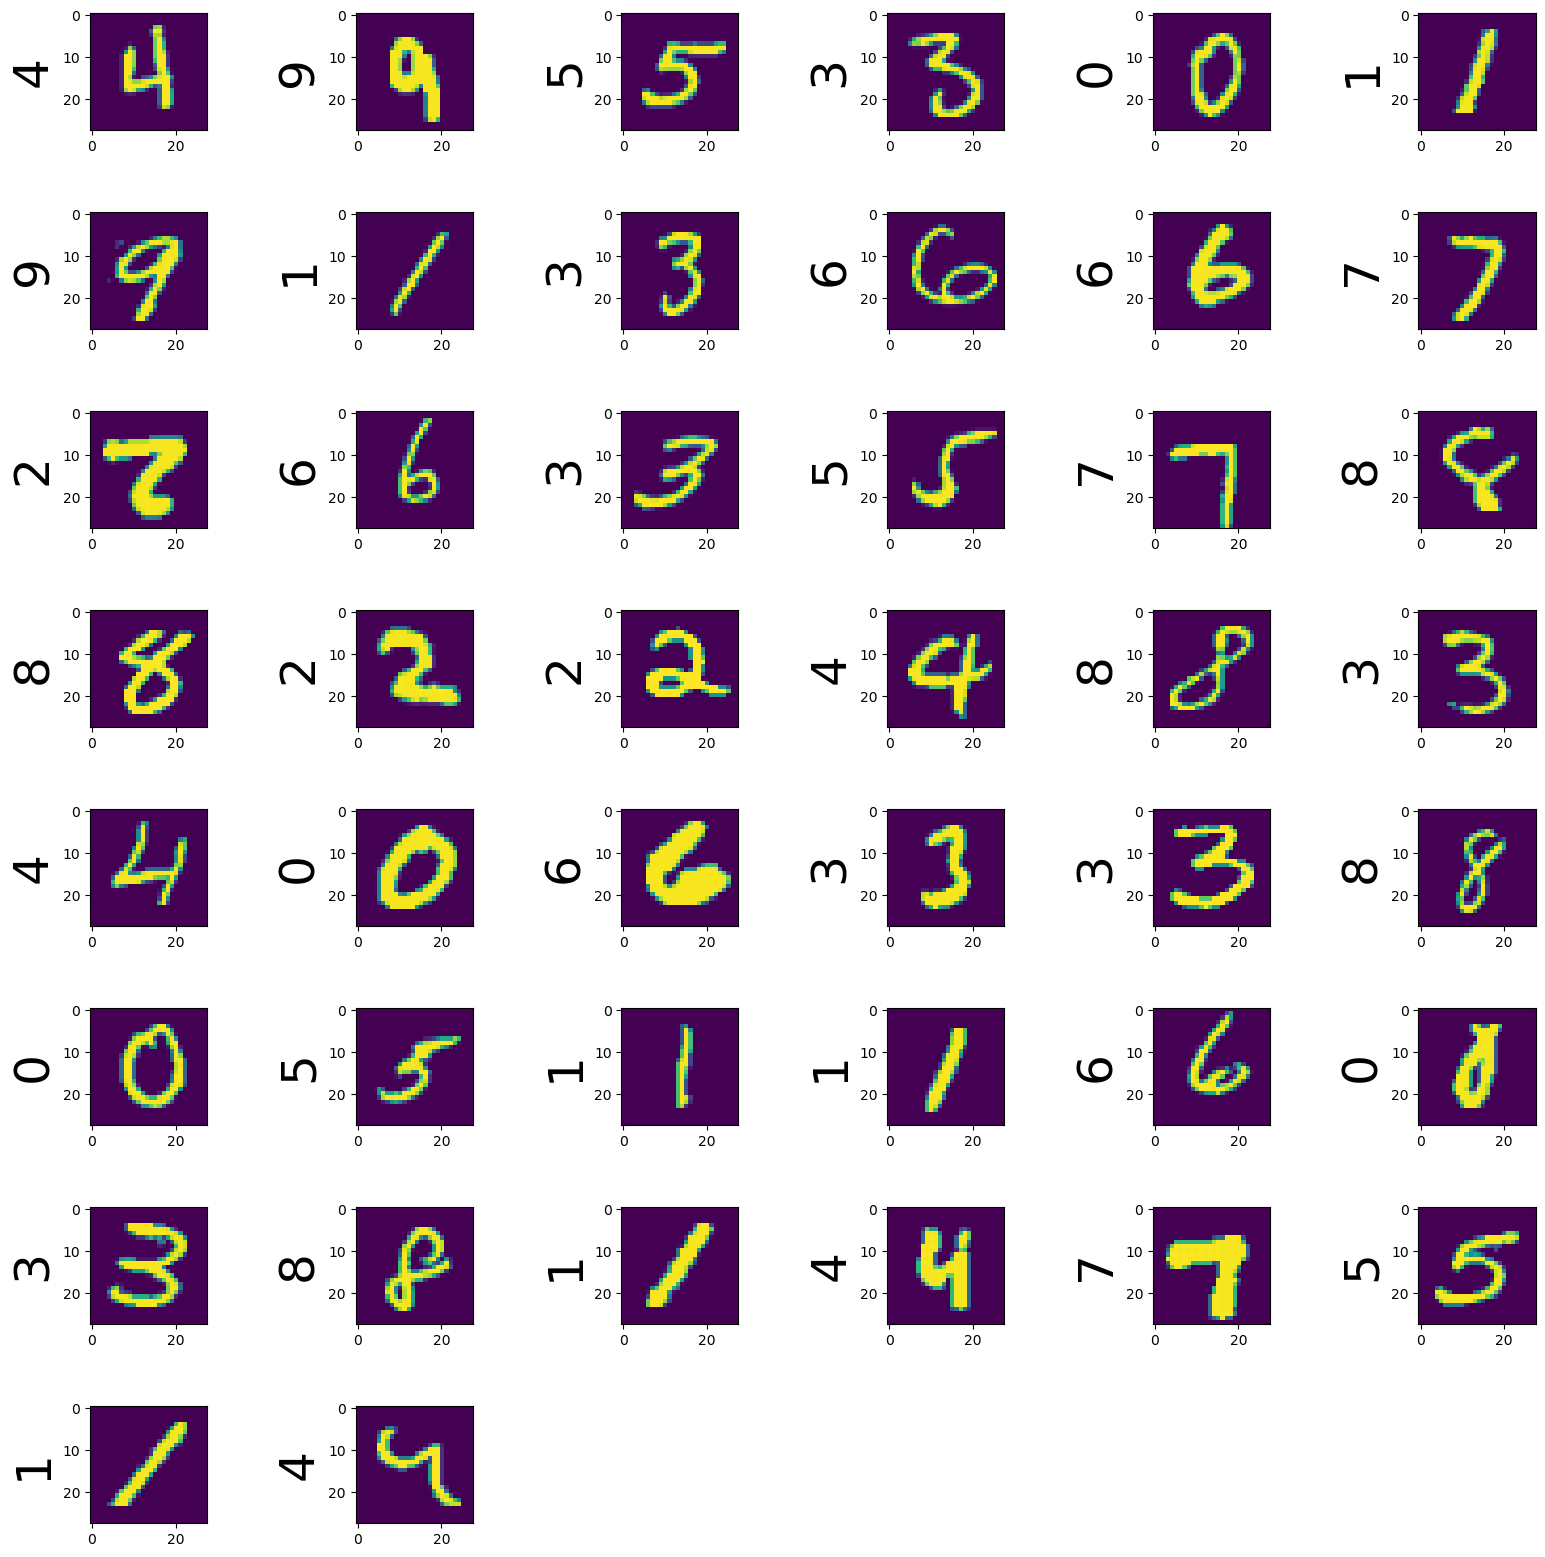

In [27]:
from random import choice
import numpy as np
fig = plt.figure(figsize=(20, 20), dpi=100)
plt.subplots_adjust(hspace=0.7)
for i in range(1, 45):
    ax = plt.subplot(8, 6, i)
    x = choice(X_train)
    p = np.argmax(model.predict(np.expand_dims(np.expand_dims(x, axis=0),axis=3)))
    ax.imshow(x)
    ax.set_ylabel(str(p), fontsize=35)